# MNIST Handwritten Digit Recognition

In [25]:
# Import libraries
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
from tqdm import tqdm

In [26]:
# Load MNIST dataset
data_path = "data/"
if not os.path.exists(data_path): 
    os.mkdir(data_path)
batch_size_train = 100
batch_size_test = 100
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('data/', train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize((0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('data/', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize((0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size_test, shuffle=True)

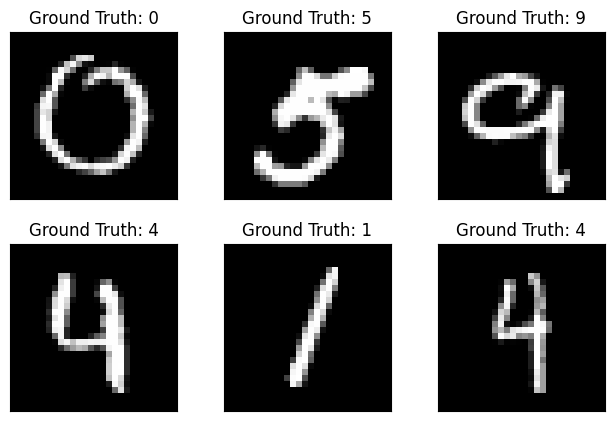

In [27]:
# Show some examples
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

for idx in range(6):
    plt.subplot(2,3,idx+1)
    plt.tight_layout()
    plt.imshow(example_data[idx][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[idx]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [28]:
# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [29]:
learning_rate = 0.01
momentum = 0.5
# Instantiate the model
network = Net()
# Instantiate the optimizer
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

In [30]:
test_losses = []
accuracies = []
n_epochs = 10
for epoch in range(n_epochs): 
    # Training
    network.train()
    progress = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(progress):
        # Inference
        output = network(data)
        # Compute the loss
        loss = F.cross_entropy(output, target)
        # Gradient descent
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Log the result
        progress.set_postfix(loss=loss.item())
    # Testing
    test_loss = 0
    accuracy = 0
    correct = 0
    count = 0
    network.eval()
    progress = tqdm(test_loader)
    for batch_idx, (data, target) in enumerate(progress):
        with torch.no_grad():
            # Inference
            output = network(data)
            # Compute the loss
            test_loss += F.cross_entropy(output, target, size_average=False).item()
            # Get the prediction
            pred = output.data.max(1, keepdim=True)[1]
            # Count correct predictions
            correct += pred.eq(target.data.view_as(pred)).sum()
            count += target.shape[0]
        # Log the result
        progress.set_postfix(loss=loss.item(), accu=(correct/count).item())
        test_loss /= len(test_loader.dataset)
        accuracy = correct/count
        test_losses.append(test_loss)
        accuracies.append(accuracy)
    print(f"[Epoch {epoch}]: loss={test_loss}, accuracy={accuracy}")

  1%|          | 4/600 [00:00<00:36, 16.29it/s, loss=2.31]

  0%|          | 0/100 [00:00<?, ?it/s]/home/szheng22/anaconda3/envs/dl_tutorial/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
100%|██████████| 100/100 [00:04<00:00, 24.53it/s, accu=0.925, loss=0.509]


[Epoch 0]: loss=0.0025428796742990017, accuracy=0.9254999756813049


100%|██████████| 100/100 [00:03<00:00, 28.52it/s, accu=0.952, loss=0.37]


[Epoch 1]: loss=0.0015526885726952222, accuracy=0.9521999955177307


100%|██████████| 100/100 [00:03<00:00, 25.65it/s, accu=0.963, loss=0.322]


[Epoch 2]: loss=0.001780985578442875, accuracy=0.9629999995231628


100%|██████████| 100/100 [00:03<00:00, 27.45it/s, accu=0.972, loss=0.327]


[Epoch 3]: loss=0.00032414146451565816, accuracy=0.9718000292778015


100%|██████████| 100/100 [00:03<00:00, 26.69it/s, accu=0.974, loss=0.136]


[Epoch 4]: loss=0.0007022534436426089, accuracy=0.9735999703407288


100%|██████████| 100/100 [00:03<00:00, 28.19it/s, accu=0.975, loss=0.304]


[Epoch 5]: loss=0.0007710745772573037, accuracy=0.9753999710083008


100%|██████████| 100/100 [00:03<00:00, 27.95it/s, accu=0.979, loss=0.168]


[Epoch 6]: loss=0.000920989561577386, accuracy=0.978600025177002


100%|██████████| 100/100 [00:03<00:00, 28.42it/s, accu=0.979, loss=0.182]


[Epoch 7]: loss=0.0008105986518928903, accuracy=0.9793000221252441


100%|██████████| 100/100 [00:03<00:00, 28.02it/s, accu=0.98, loss=0.0758]


[Epoch 8]: loss=0.00040631629829345563, accuracy=0.9804999828338623


100%|██████████| 100/100 [00:03<00:00, 27.35it/s, accu=0.982, loss=0.136]

[Epoch 9]: loss=0.0006461361334050178, accuracy=0.9815999865531921
